## Read the Data Set

In [5]:
# import library, read and show the dataset
import pandas as pd

df_reviews = pd.read_csv('IMDB Dataset.csv')
df_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [9]:
# take a sample of 10000 rows to make processing faster and get imbalance data
# 9000 positives
df_positive = df_reviews[df_reviews['sentiment'] == 'positive'][:9000]
# 1000 negative
df_negative = df_reviews[df_reviews['sentiment'] == 'negative'][:1000]

In [10]:
df_reviews_imdb = pd.concat([df_positive, df_negative])

In [11]:
df_reviews_imdb['sentiment'].value_counts()

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

## Deal with Imbalanced Classes

<Axes: xlabel='sentiment'>

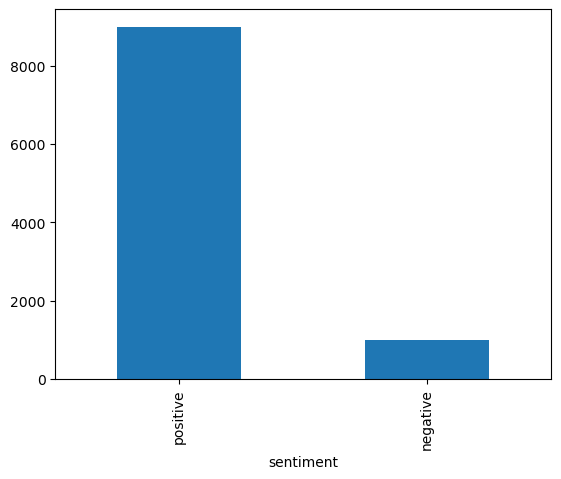

In [13]:
# make a barplot to show how data is distributed
df_reviews_imdb['sentiment'].value_counts().plot(kind='bar')

## Balance the Data with .sample()

In [22]:
length_negative = len(df_reviews_imdb[df_reviews_imdb['sentiment']=='negative'])

In [23]:
df_reviews_positive = df_reviews_imdb[df_reviews_imdb['sentiment']=='positive'].sample(n=length_negative)

In [26]:
df_reviews_negative = df_reviews_imdb[df_reviews_imdb['sentiment']=='negative']

In [27]:
df_reviews_bal = pd.concat([df_reviews_positive, df_reviews_negative])

In [30]:
df_reviews_bal.reset_index(drop=True, inplace=True)

In [31]:
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

## Balance the Data with RandomUnderSampler

In [34]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

df_reviews_bal, df_reviews_bal['sentiment'] = rus.fit_resample(df_reviews_imdb[['review']],
                                                             df_reviews_imdb['sentiment'])

In [36]:
df_reviews_imdb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

In [37]:
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

## Split the Data into Train and Test Sets

In [38]:
# import train_test_split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_reviews_bal, test_size=0.33, random_state=42)

In [41]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [43]:
train_x
train_y.value_counts()

sentiment
negative    675
positive    665
Name: count, dtype: int64